# **Author Information:**

- Email: hasaankhan175@gmail.com
 
- **Github**: [Hasaan's Github](https://github.com/hasaankhan175)

- **Kaggle**: [Hasaan's Kaggle]()

- **linkedIN**: [Hasaan's linkedIN]()


___

# **About Dataset**
### **Overview**
This dataset contains detailed records of coffee sales from a vending machine.
The vending machine is the work of a dataset author who is committed to providing an open dataset to the community.
It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

### **Data Collection Period**
The dataset spans from March 2024 to Present time, capturing daily transaction data. And new information continues to be added.

### **Author**
Yaroslav Isaienkov @ihelon

## 🎯 Objective

The goal of this project is to **clean**, **analyze**, and **visualize** the Coffee Sales dataset obtained from Kaggle. The analysis will be performed using both **Python libraries** (such as Pandas, Matplotlib, Seaborn, and Plotly) and **Power BI** to gain meaningful business insights from the sales data.

### Key Objectives:

- 🧹 **Data Cleaning**: Handle correct data types, and prepare the dataset for analysis.
- 📊 **Data Visualization in Python**: Use Python libraries to explore trends, patterns, and relationships in the data.
- 📈 **Dashboarding in Power BI**: Build interactive visualizations and dashboards to summarize key metrics and insights for stakeholders.

This project will help develop practical skills in both **data preprocessing** and **business intelligence reporting**.


# **LETS DO IT BY IMPORTING THE DATASET**

In [ ]:
# import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # ignore unnecessary warnings


In [7]:
sales= pd.read_csv("D:\portfolio_of_data_science\coffee sales powrbi\dataset\index_1.csv")

In [19]:
# head of the dataset
sales.head(10)

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,33.8,Americano with Milk


***As we can see that card column is unnecessary column in our dataset***

In [11]:
# remove card column
sales = sales.drop(['card'], axis=1)

In [12]:
# statistic description of the dataset
sales.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


The code `sales.describe()` provides a **descriptive statistical summary** of the numerical column `money`, which represents the sales revenue in the dataset. Below is a breakdown of the output:

- **Count**: `3636` entries — the total number of records in the `money` column.
- **Mean**: `31.75` — the average sales value.
- **Standard Deviation (std)**: `4.92` — measures the spread or variability of the sales data.
- **Minimum (min)**: `18.12` — the lowest sales amount recorded.
- **25% (1st Quartile)**: `27.92` — 25% of the sales are below this value.
- **50% (Median)**: `32.82` — the middle value, with 50% of the data below and 50% above.
- **75% (3rd Quartile)**: `35.76` — 75% of the sales are below this value.
- **Maximum (max)**: `40.00` — the highest sales amount recorded.

This summary helps to quickly understand the **distribution, central tendency, and variability** of the sales data, which is essential for further analysis and visualization.

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   money        3636 non-null   float64
 4   coffee_name  3636 non-null   object 
dtypes: float64(1), object(4)
memory usage: 142.2+ KB


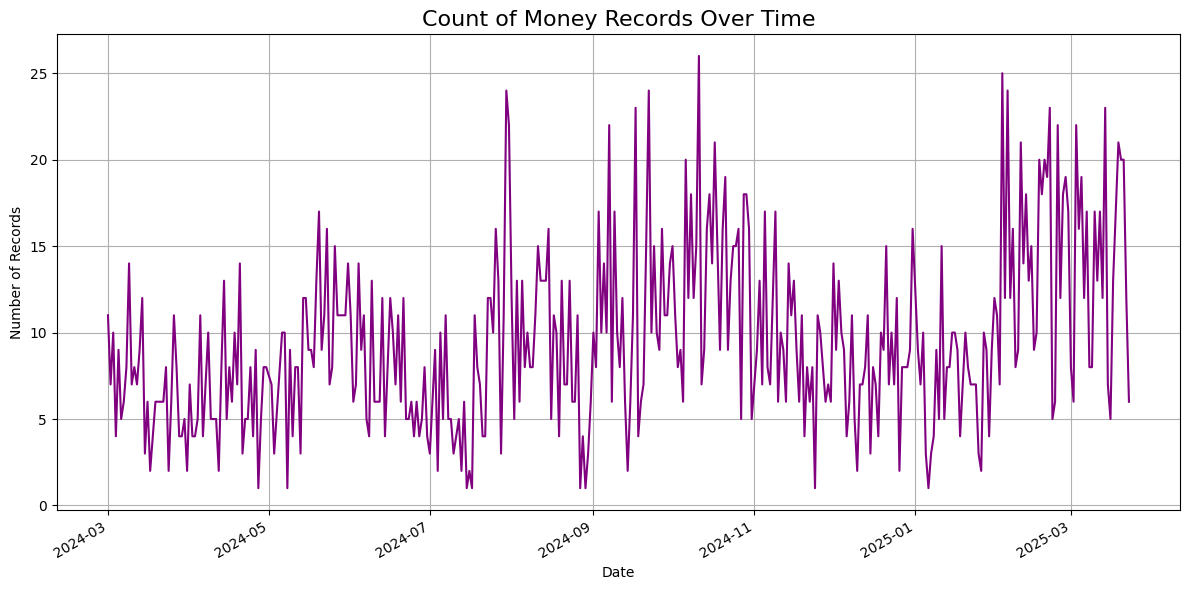

In [ ]:
# convert the date column is in datetime format
sales['date'] = pd.to_datetime(sales['date'])

# Group by date and count how many transactions occurred per day
money_count_per_day = sales.groupby('date').size()

# Plotting the count of money entries per day
plt.figure(figsize=(12, 6))
money_count_per_day.plot(kind='line', color='purple')
plt.title('Count of Money Records Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True)
plt.tight_layout()
plt.show()


The line chart titled "Count of Money Records Over Time" displays the number of sales transactions recorded each day across a time period ranging from March 2024 to March 2025. The y-axis represents the number of records (frequency of sales entries), while the x-axis shows the dates. The plot reveals fluctuating activity over time, with noticeable peaks especially around September to November 2024 and early 2025 indicating periods of increased sales activity. Meanwhile, several dips suggest days with fewer or no transactions, pointing to potential seasonality or irregular sales behavior within the dataset.


In [26]:
# plot of count of coffee sales over time
plt.figure(figsize=(12, 6))
px.histogram(sales, y='coffee_name' , color='coffee_name')

<Figure size 1200x600 with 0 Axes>

This chart represents the frequency of different coffee types sold, based on the coffee_name column. Among the listed coffee options, "Americano with Milk" is the most popular, with 824 sales, followed closely by "Latte" with 782 sales. Traditional "Americano" and "Cappuccino" also show strong performance, with 578 and 501 sales respectively. In contrast, drinks like "Cortado", "Hot Chocolate", "Cocoa", and "Espresso" have significantly lower sales, suggesting they are less favored by customers. This distribution highlights customer preferences, with milk-based and milder coffee variants being more commonly purchased compared to stronger or niche options.


# **ADDING A COLUMN BASED ON SEASON**

In [28]:
# Define a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to the month of the date column
sales['season'] = sales['date'].dt.month.apply(get_season)


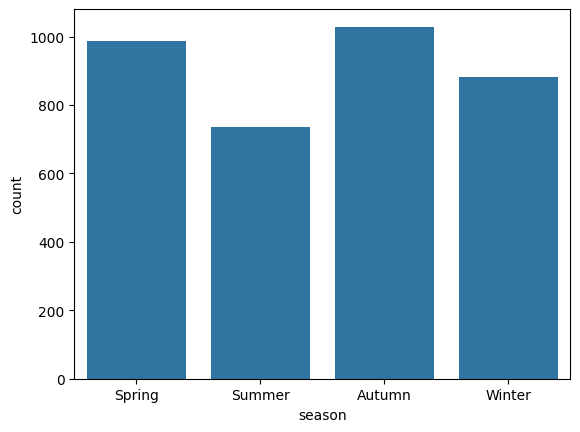

In [31]:
sns.countplot(sales, x='season')
print("========================================================")
px.histogram(sales, x='season')

- 🍂 **Autumn** has the highest number of sales with 1,029 transactions, indicating strong coffee demand during this season.

- 🌸 **Spring** follows with 988 sales, suggesting consistent customer activity in moderate weather.

- ❄️ **Winter** records 883 sales, showing that colder months still drive significant coffee purchases, likely due to the preference for warm beverages.

- ☀️ **Summer** has the lowest sales at 736, which may reflect reduced demand for hot drinks in warmer weather.

This distribution reveals a clear trend where cooler seasons—Autumn and Winter—tend to have higher coffee sales, which is expected for a warm beverage business.



In [32]:
sales['season'].value_counts()

season
Autumn    1029
Spring     988
Winter     883
Summer     736
Name: count, dtype: int64

---

In [34]:
px.histogram(sales, y='cash_type' , color='cash_type')

- 💳 **Card payments** dominate with 3,547 transactions, showing that the vast majority of customers prefer using cards (credit/debit) for their coffee purchases.

- 💵 **Cash payments** are significantly lower, with only 89 transactions, indicating that cash is rarely used.

# 🔍 **Insights:**
The business is heavily reliant on digital or cashless transactions.

This may reflect customer preferences, the cafe's operational setup (e.g., POS systems), or trends in the local economy favoring cashless payments.

It’s important for the business to ensure robust card payment systems due to the high dependency on them.

<Axes: ylabel='money'>

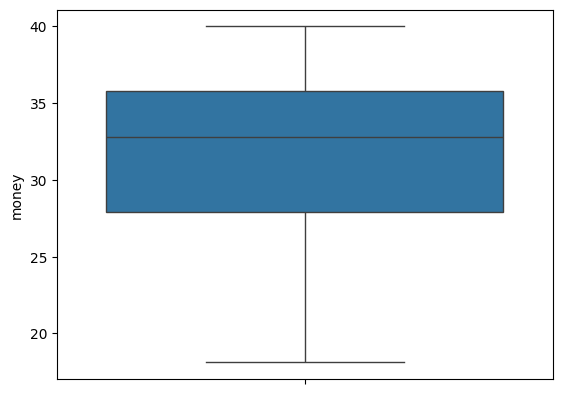

In [43]:
sns.boxplot(y = sales['money'])

There is no outliers in this dataset

<Axes: xlabel='money', ylabel='Count'>

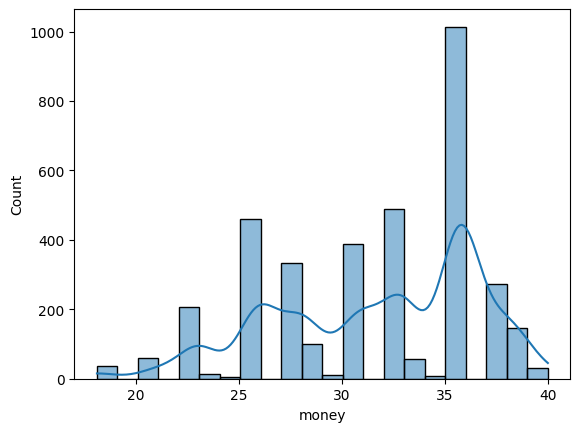

In [47]:
sns.histplot(x = sales['money'] , kde=True)

### **Peak Sales:** 
There is a noticeable peak around the value of 35, indicating that most sales occurred at this price point.


### **Distribution Shape:** 
The distribution appears somewhat right-skewed, with more sales happening at lower price points and a significant drop-off as the price increases beyond 35.


### **Sales Variability:** 
The presence of bars at various money values suggests variability in sales, with some price ranges being more popular than others

In [49]:
sales.groupby('season')['money'].mean()

season
Autumn    31.555238
Spring    33.219251
Summer    30.283342
Winter    31.542559
Name: money, dtype: float64

🌸 **Spring** has the highest average sale amount at 33.22, suggesting that customers tend to spend more per transaction during this season — possibly due to promotions or popular product offerings.

🍂 **Autumn and ❄️ Winter** have very similar average values, around 31.55, indicating stable spending patterns in cooler months.

☀️ **Summer** has the lowest average at 30.28, which may reflect reduced demand for expensive hot drinks or smaller orders due to heat.

## 💡 Insight:
Spring shows the most profitable average per transaction.

Businesses could analyze what products or campaigns work best in Spring and replicate those strategies in lower-performing seasons like Summer.

# **LETS MOVE TO THE POWER BI TO CREATE A DASHBOARD**

In [56]:
# exporting the final dataset by pandas
sales = sales.drop(['money_bin'], axis = 1)

In [57]:

sales.to_csv(r"D:\portfolio_of_data_science\coffee sales powrbi\dataset\final_dataset.csv", index=False)

# **END OF THE NOTEBOOK**
# **THANKS FOR LOOKING INTO IT**

----

# 👤 **Author Information**

<div style="font-family: Arial, sans-serif; padding: 10px; border: 2px solid #ffffffff; border-radius: 10px; background: linear-gradient(to right, #0885ebff, #0885ebff); animation: fadeIn 2s ease-in-out;">
  <p style="font-size: 18px;"><strong>Email:</strong> <a href="mailto:hasaankhan175@gmail.com">hasaankhan175@gmail.com</a></p>
  <p style="font-size: 18px;"><strong>Github:</strong> <a href="https://github.com/hasaankhan175" target="_blank">Hasaan's GitHub</a></p>
  <p style="font-size: 18px;"><strong>Kaggle:</strong> <a href="https://www.kaggle.com/hasaankhan175" target="_blank">Hasaan's Kaggle</a></p>
  <p style="font-size: 18px;"><strong>LinkedIn:</strong> <a href="https://www.linkedin.com/in/hasaan-khan-422249289" target="_blank">Hasaan's LinkedIn</a></p>
</div>

<style>
@keyframes fadeIn {
  from { opacity: 0; transform: translateY(20px); }
  to { opacity: 1; transform: translateY(0); }
}
</style>
